#Laboratorio 6: Oscilaciones forzadas amortiguadas.


La ecuación diferencial original que describe el sistema es:

\begin{equation}
I\ddot{\theta} + b\dot{\theta} + I\omega_n^2 \theta = F_0 L \cos(\omega t)
\end{equation}

Dividiendo la ecuación por $I$ y reescribiendo el coeficiente de amortiguamiento $b$ en términos del factor de amortiguamiento $\beta = \frac{b}{2I}$, la ecuación se convierte en:

\begin{equation}
\ddot{\theta} + 2\beta \dot{\theta} + \omega_n^2 \theta = \frac{F_0 L}{I} \cos(\omega t)
\end{equation}

Para encontrar la amplitud de la solución en estado estacionario, suponemos una solución de la forma $\theta(t) = \eta(\omega) e^{-i\omega t}$ y tratamos el coseno como la parte real de una exponencial compleja: $\cos(\omega t) = \text{Re}(e^{i\omega t})$.

Sustituyendo esto en la ecuación diferencial, obtenemos:

\begin{equation}
-I\omega^2 \eta(\omega) e^{-i\omega t} + 2\beta(-i\omega \eta(\omega) e^{-i\omega t}) + \omega_n^2 \eta(\omega) e^{-i\omega t} = \frac{F_0 L}{I} e^{-i\omega t}
\end{equation}

Dividiendo ambos lados por $e^{-i\omega t}$ y resolviendo para $\eta(\omega)$:

\begin{equation}
\eta(\omega) = \frac{\frac{F_0 L}{I}}{\omega_n^2 - \omega^2 + 2i\beta \omega}
\end{equation}

La amplitud de la respuesta es el módulo de $\eta(\omega)$:

\begin{equation}
|\eta(\omega)| = \frac{\frac{F_0 L}{I}}{\sqrt{(\omega_n^2 - \omega^2)^2 + (2\beta \omega)^2}} = \frac{F_0 L / I}{\sqrt{(\omega_n^2 - \omega^2)^2 + 4\beta^2 \omega^2}}
\end{equation}

Haciendo un cambio de variable donde $\omega_{\text{res}}^2 = \omega_n^2 - 2\beta^2$, obtenemos:

\begin{equation}
|\eta(\omega)| = \frac{F_0 L / I}{\sqrt{(\omega^2 - \omega_{\text{res}}^2)^2 + 4\beta^2(\omega_n^2 - \beta^2)}}
\end{equation}

Dado que $|\eta(\omega)|$ proviene de la solución de $\theta(t)$, la amplitud medida en el sistema, considerando que el desplazamiento angular pequeño es $L\sin(\theta(t))$ y aproximadamente $L\theta(t)$, es:

\begin{equation}
A(\omega) = |\eta(\omega)|L = \frac{F_0 L^2}{I \sqrt{(\omega^2 - \omega_{\text{res}}^2)^2 + 4\beta^2(\omega_n^2 - \beta^2)}}
\end{equation}

Esta es la expresión de la amplitud del movimiento en el estado estacionario en función de la frecuencia de excitación $\omega$.

In [1]:
!pip install uncertainties

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 965.4 kB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uc
import uncertainties.umath as um
from scipy.optimize import curve_fit
from scipy.stats import t
from uncertainties import unumpy
import uncertainties.unumpy as unumpy
import pandas as pd
from google.colab import files

In [3]:
#k1
#T_grupo : 15 oscilaciones
T_grupo = [6.96,6.94,6.90,6.89,6.89,6.84,6.89,6.89,6.83,6.89]
m_k1 = 0.038

#k1 = []
#for i in range(len(T_grupo)):
#  k1.append(4*np.pi*m_k1/T_grupo[i]**2)
#print(k1)

In [4]:
#for i in range(len(k1)):
#  k1_media = np.mean(k1[i])
#  k1_std = np.std(k1[i])

#print(k1_media)
#print(k1_std)

In [5]:
for i in range(len(T_grupo)):
  T_mean = uc.ufloat(np.mean(T_grupo[i])/15, 0.05)

print(T_mean)

k3 = (2*np.pi)**2*m_k1/T_mean**2
print(k3)

0.46+/-0.05
7.1+/-1.5


In [6]:
g = 9.792
peso_masa = uc.ufloat(0.347,0.005) * g
#des_x_1
des_x_2 = uc.ufloat(0.160 - 0.105,0.005) #marcado, plastico
des_x_3 = uc.ufloat(0.165 - 0.110,0.005) #no marcado, plastico

#k_1
k1 = peso_masa/des_x_2

k2 = peso_masa/des_x_3
print(k1)
print(k2)

62+/-6
62+/-6


In [7]:
#frecuencia natural
L12 = uc.ufloat(0.405, 0.01) #longitud desde el pivote hasta el punto de contacto de la fuerza k1 y k2
L3 = uc.ufloat(0.436, 0.001) #longitud desde el pivote hasta el punto de contacto de la fuerza k3
r_cm = uc.ufloat(0.337, 0.001) #longitud desde el pivote hasta el centro de masa del pendulo
m_pendulo = uc.ufloat(0.1600,0.0001) #masa del pendulo
#para el momento de inercia se mide el periodo en 10 grupos de oscilaciones, de 15 oscilaciones cada uno
T_grupo_I = [18.29,18.20,17.97,18.27,18.30,18.29,18.32,18.40,18.23]
T_I = uc.ufloat(np.mean(T_grupo_I)/15, np.std(T_grupo_I)/15)
print(T_I)
I = (m_pendulo*g*r_cm*T_I**2)/(4*np.pi**2)
print(I)
f_nat = um.sqrt(((k3*L3**2+(k1+k2)*L12**2+r_cm*m_pendulo*g)/I))/(2*np.pi)
print(f_nat)
#fuerza aplicada al pendulo
#F0 = radio de giro del motor * k_resorte
F0  = uc.ufloat(0.5,0.05) /100 * k3 #[N]

1.217+/-0.008
0.01980+/-0.00025
5.32+/-0.21


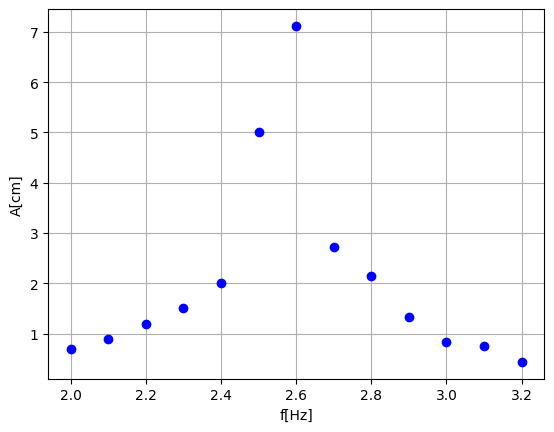

In [10]:
V = [0.100, 0.105, 0.136, 0.175, 0.200, 0.300, 0.650, 0.270, 0.220, 0.150, 0.107, 0.100, 0.072]
f = np.array([2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2])
A = np.array([0.7, 0.9, 1.2, 1.5, 2.0, 5.0, linear_func(V[6], params[0], params[1]), linear_func(V[7], params[0], params[1]), linear_func(V[8], params[0], params[1]), linear_func(V[9], params[0], params[1]), linear_func(V[10], params[0], params[1]), linear_func(V[11], params[0], params[1]), linear_func(V[12], params[0], params[1])]) #las amplitudes no medidas se infieren con regresion lineal de estos datos
A_m = A/100
#plt.plot(f_exp,V_A_exp,'ro')
plt.plot(f,A,'bo')
plt.xlabel('f[Hz]')
plt.ylabel('A[cm]')
#plt.plot(f,V,'go')
plt.grid()

df = pd.DataFrame({'V [V]': V, 'f [Hz]': f,'A [m]': A_m})
df.to_csv('output.csv', index=False)

In [ ]:
files.download('output.csv')

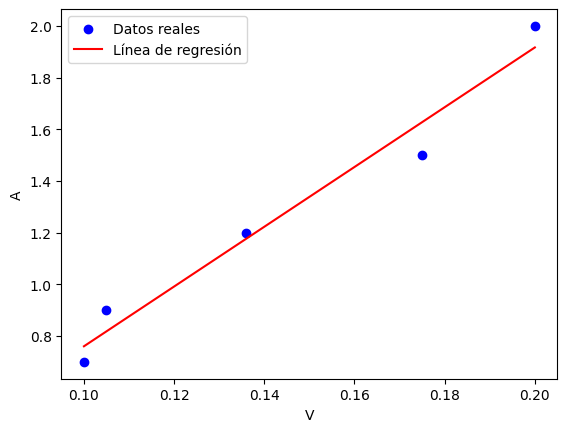

(11.561695679679936, -0.3956348213301671)

In [9]:
def linear_func(x, m, c):
    return m * x + c

V = np.array([0.100, 0.105, 0.136, 0.175, 0.200])
A = np.array([0.7, 0.9, 1.2, 1.5, 2.0])

params, _ = curve_fit(linear_func, V, A)

m, c = params

A_pred_curve_fit = linear_func(V, m, c)

plt.scatter(V, A, color='blue', label='Datos reales')
plt.plot(V, A_pred_curve_fit, color='red', label='Línea de regresión')
plt.xlabel('V')
plt.ylabel('A')
plt.legend()
plt.show()

m, c

In [11]:
def AmplitudMec(x,Beta):
  g = 9.79199554
  Tg = g*m_pendulo*r_cm
  wn2 = ((k1+k2) * L12**2 +k3*L3**2+ Tg)/(4*I) #se multiplica por 4 para probar un factor que puede llegar a faltar.
  w = x*2*np.pi
  wr2 = (uc.ufloat(2.6,0.05)*2*np.pi)**2

  Denominador = I * ((w**2 - wr2)**2 + 4*Beta**2*(wn2+Beta*2))**0.5/2
  return unumpy.nominal_values(F0*L3**2 / Denominador)


gamma = 0.01
tn1    = t.ppf(1-gamma/2,len(A)-1)

popt, pcov = curve_fit(AmplitudMec,f,A_m,bounds=(0,np.inf))
Beta = uc.ufloat(popt[0],tn1*pcov[0][0]**0.5)

print(f'El valor de Beta es {Beta}')

El valor de Beta es 0.28+/-0.07


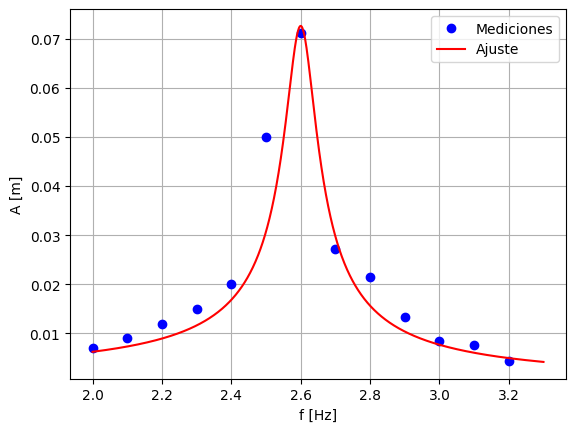

In [12]:
f_curva = np.linspace(2,3.3,1000)
plt.plot(f,A_m,'bo',label='Mediciones')
plt.plot(f_curva,AmplitudMec(f_curva,Beta),'r-',label='Ajuste')
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('A [m]')
plt.legend()

In [13]:
Tg = g*m_pendulo*r_cm
wn2 = um.sqrt(((k1+k2) * L12**2 +k3*L3**2+ Tg)/(I))/(4*np.pi)
print(wn2)
print(AmplitudMec(f,Beta))
wr2 = (uc.ufloat(2.6,0.05)*2*np.pi)**2
print(um.sqrt(wr2)/(2*np.pi))

2.66+/-0.10
[0.00624124 0.00731989 0.00893665 0.01161044 0.01681957 0.0307185
 0.07261262 0.02975714 0.01563363 0.01037124 0.00767542 0.00604554
 0.00495675]
2.60+/-0.05
